Diabetes patient records were obtained from two sources: an automatic electronic recording device and paper records. The automatic device had an internal clock to timestamp events, whereas the paper records only provided "logical time" slots (breakfast, lunch, dinner, bedtime). For paper records, fixed times were assigned to breakfast (08:00), lunch (12:00), dinner (18:00), and bedtime (22:00). Thus paper records have fictitious uniform recording times whereas electronic records have more realistic time stamps.

Diabetes files consist of four fields per record. Each field is separated by a tab and each record is separated by a newline.

File Names and format:
(1) Date in MM-DD-YYYY format
(2) Time in XX:YY format
(3) Code
(4) Value









The Code field is deciphered as follows:

33 = Regular insulin dose
34 = NPH insulin dose
35 = UltraLente insulin dose
48 = Unspecified blood glucose measurement
57 = Unspecified blood glucose measurement
58 = Pre-breakfast blood glucose measurement
59 = Post-breakfast blood glucose measurement
60 = Pre-lunch blood glucose measurement
61 = Post-lunch blood glucose measurement
62 = Pre-supper blood glucose measurement
63 = Post-supper blood glucose measurement
64 = Pre-snack blood glucose measurement
65 = Hypoglycemic symptoms
66 = Typical meal ingestion
67 = More-than-usual meal ingestion
68 = Less-than-usual meal ingestion
69 = Typical exercise activity
70 = More-than-usual exercise activity
71 = Less-than-usual exercise activity
72 = Unspecified special event


In [52]:
import pandas as pd
import numpy as np

In [165]:
df=pd.read_csv('data-02',delim_whitespace=True)
df

,Date,Time,Code,Value
0,10-10-1989,08:00,58,149
1,10-10-1989,08:00,33,010
2,10-10-1989,12:00,60,116
3,10-10-1989,12:00,33,004
4,10-10-1989,18:00,62,304
...,...,...,...,...
756,01-12-1990,22:00,33,016
757,01-13-1990,08:00,58,272
758,01-13-1990,08:00,33,012
759,01-13-1990,12:00,60,388


In [166]:
df['Date'] = pd.to_datetime(df['Date'])

In [168]:
df

,Date,Time,Code,Value
0,1989-10-10,08:00,58,149
1,1989-10-10,08:00,33,010
2,1989-10-10,12:00,60,116
3,1989-10-10,12:00,33,004
4,1989-10-10,18:00,62,304
...,...,...,...,...
756,1990-01-12,22:00,33,016
757,1990-01-13,08:00,58,272
758,1990-01-13,08:00,33,012
759,1990-01-13,12:00,60,388


In [169]:
df1=df.iloc[:,[0,2]]
df1

,Date,Code
0,1989-10-10,58
1,1989-10-10,33
2,1989-10-10,60
3,1989-10-10,33
4,1989-10-10,62
...,...,...
756,1990-01-12,33
757,1990-01-13,58
758,1990-01-13,33
759,1990-01-13,60


In [170]:
df1 = df1.set_index('Date')

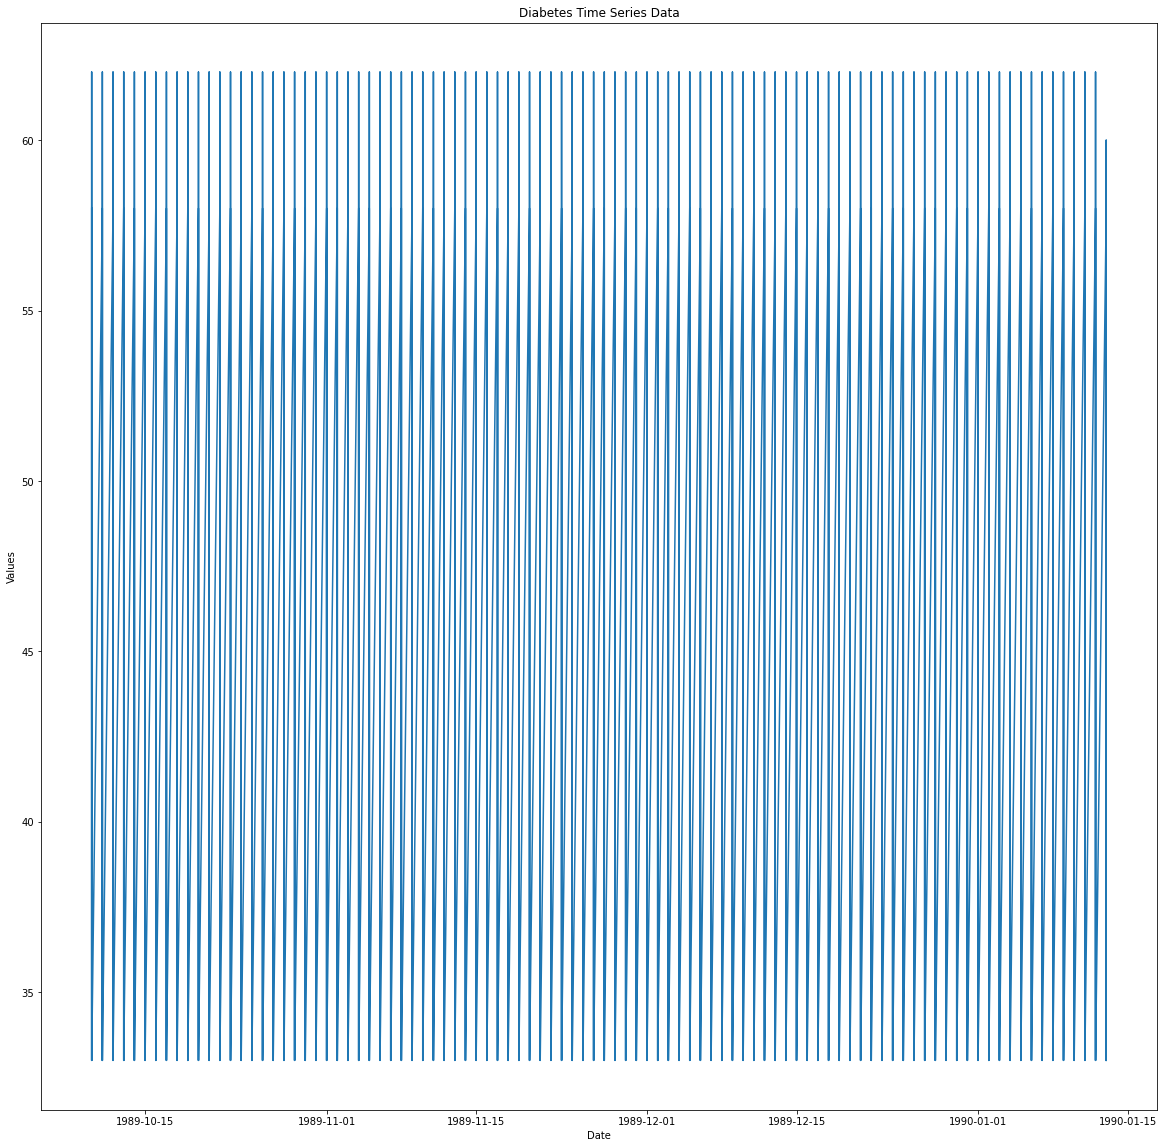

In [171]:
import matplotlib.pyplot as plt

plt.plot(df1)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Diabetes Time Series Data')
plt.show()


In [172]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1)
print('ADF Statistic: {:.2f}'.format(result[0]))
print('p-value: {:.2f}'.format(result[1]))


ADF Statistic: -7.22
p-value: 0.00


C:\Users\akash\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


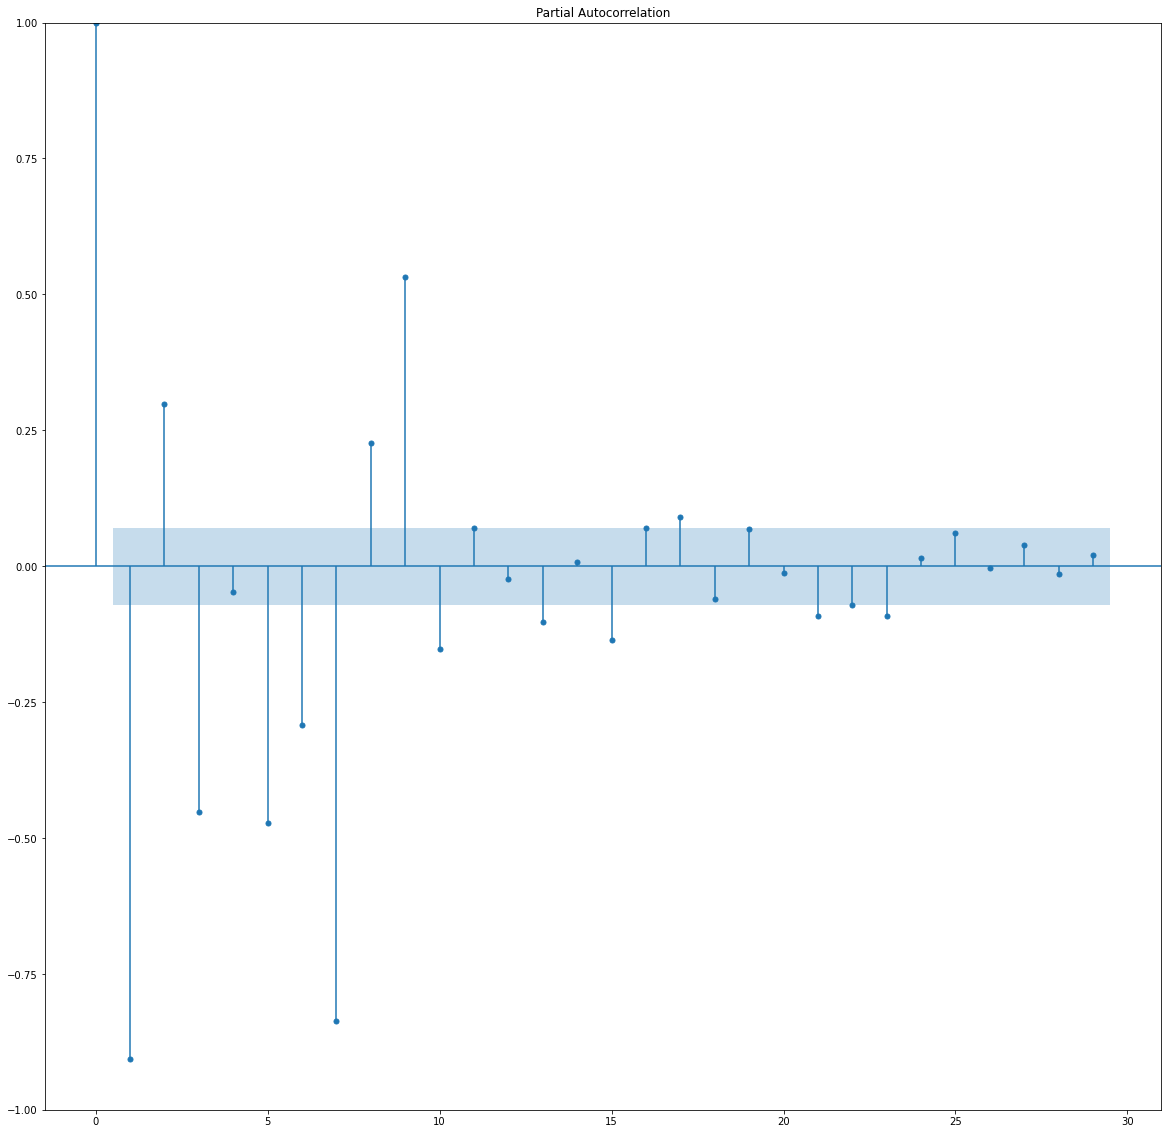

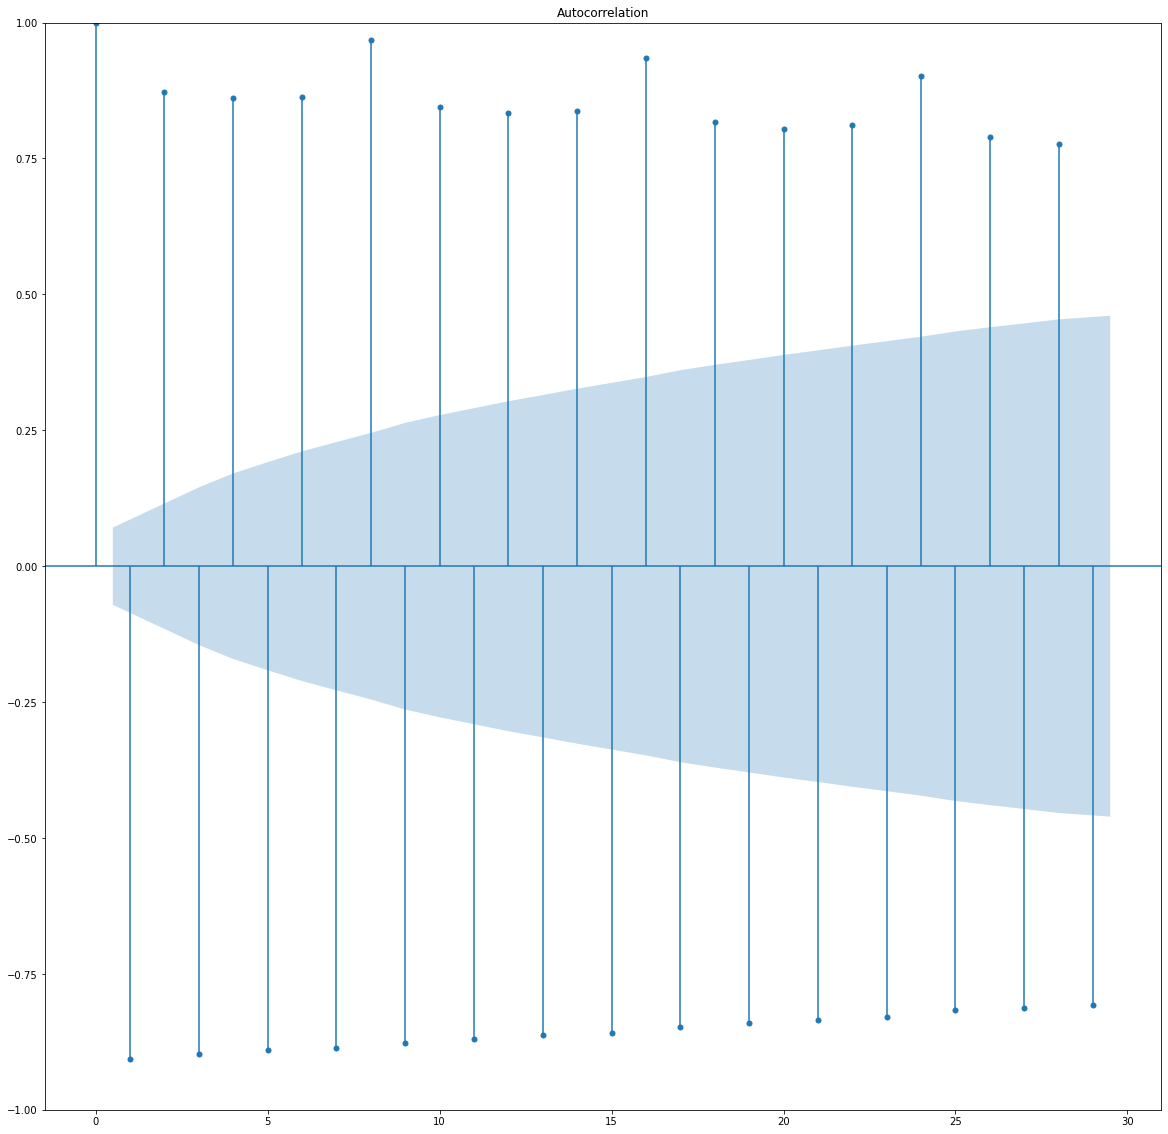

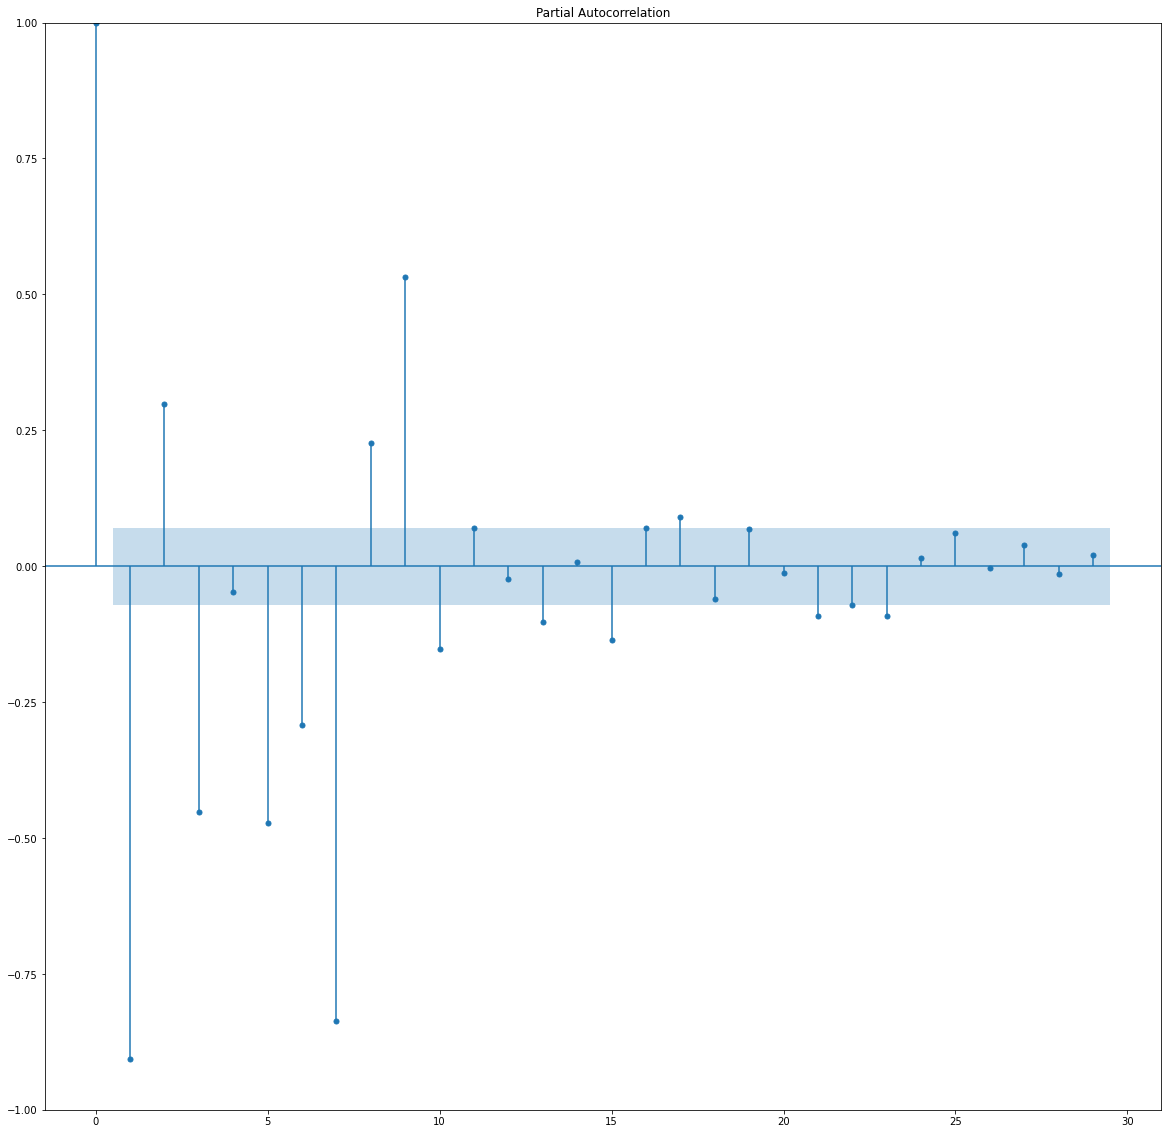

In [173]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df1)
plot_pacf(df1)

In [174]:
from statsmodels.tsa.arima_model import ARIMA

In [175]:
train_data=df1.iloc[:500,:]
train_data

,Code
Date,
1989-10-10,58
1989-10-10,33
1989-10-10,60
1989-10-10,33
1989-10-10,62
...,...
1989-12-11,60
1989-12-11,33
1989-12-11,62


In [176]:
test_data=df1.iloc[501:,:]
test_data

,Code
Date,
1989-12-12,58
1989-12-12,33
1989-12-12,60
1989-12-12,33
1989-12-12,62
...,...
1990-01-12,33
1990-01-13,58
1990-01-13,33


In [177]:
p = 2
d = 1
q = 2

In [178]:
from statsmodels.tsa.arima.model import ARIMA

In [179]:
model = ARIMA(train_data, order=(p,d,q))

C:\Users\akash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\akash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [180]:
model_fit = model.fit()

In [181]:
forecast = model_fit.forecast(steps=len(test_data))
forecast

C:\Users\akash\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


500    35.402100
501    55.529517
502    34.346708
503    55.634299
504    34.381388
         ...    
755    50.306012
756    39.698066
757    50.276793
758    39.727204
759    50.247734
Name: predicted_mean, Length: 260, dtype: float64

In [182]:
a=test_data.index
a

DatetimeIndex(['1989-12-12', '1989-12-12', '1989-12-12', '1989-12-12',
               '1989-12-12', '1989-12-12', '1989-12-12', '1989-12-12',
               '1989-12-13', '1989-12-13',
               ...
               '1990-01-12', '1990-01-12', '1990-01-12', '1990-01-12',
               '1990-01-12', '1990-01-12', '1990-01-13', '1990-01-13',
               '1990-01-13', '1990-01-13'],
              dtype='datetime64[ns]', name='Date', length=260, freq=None)

In [183]:
forecast = pd.DataFrame(forecast)

In [184]:
forecast=forecast.set_index(test_data.index)

In [185]:
forecast

,predicted_mean
Date,
1989-12-12,35.402100
1989-12-12,55.529517
1989-12-12,34.346708
1989-12-12,55.634299
1989-12-12,34.381388
...,...
1990-01-12,50.306012
1990-01-13,39.698066
1990-01-13,50.276793


In [186]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data, forecast)
print('MSE:',mse)


MSE: 404.0123511491551


In [187]:
plt.rcParams['figure.figsize'] = [20,20]

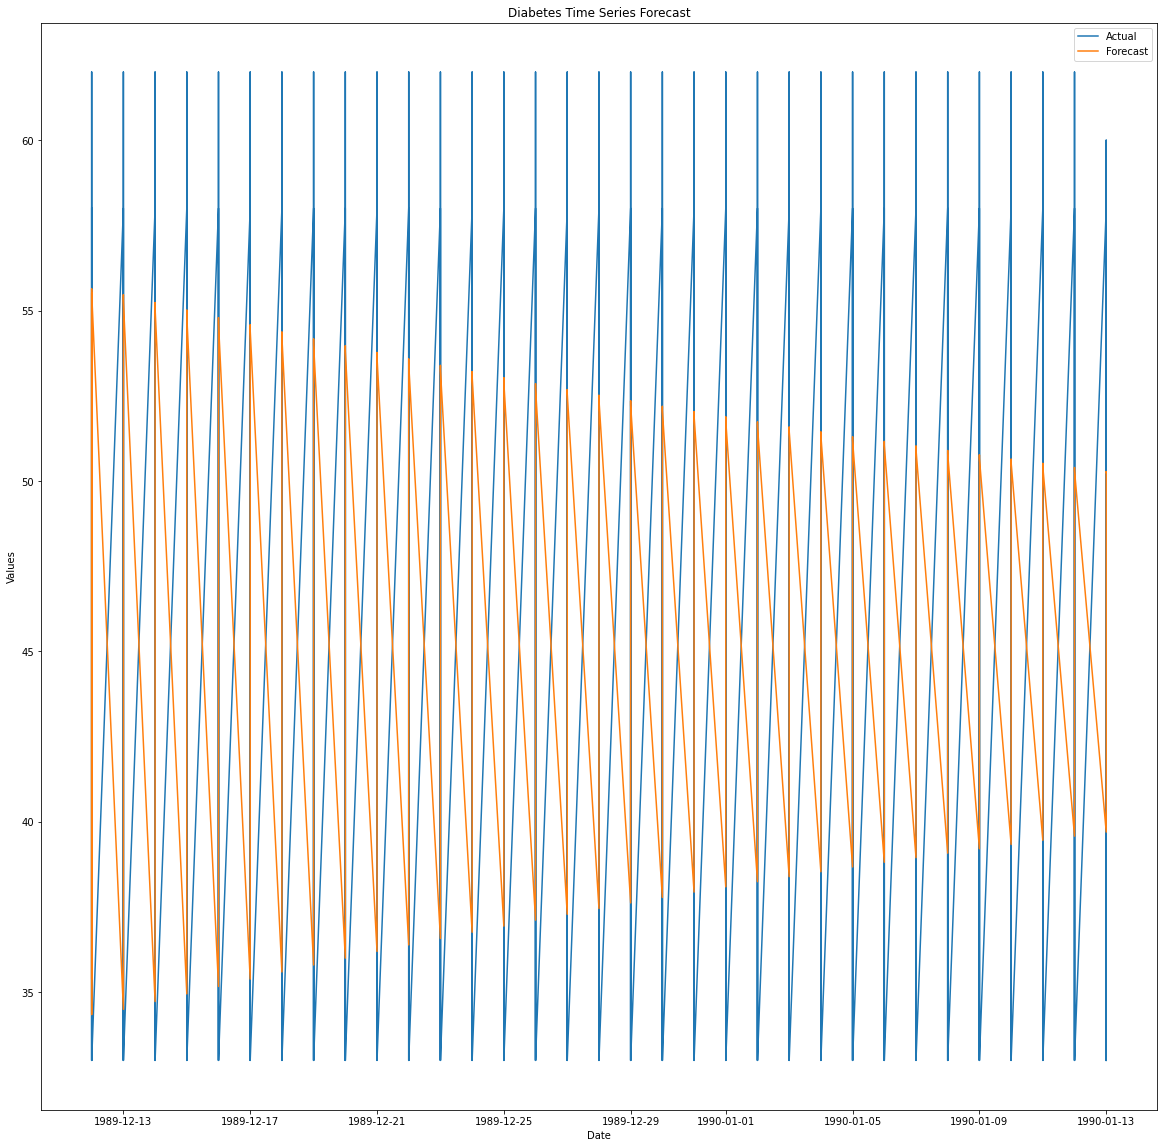

In [188]:
plt.plot(test_data, label='Actual')
plt.plot(forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Diabetes Time Series Forecast')
plt.legend()
plt.show()